In [37]:
#Part 1
import pandas as pd

# Identify shape, size of the raw data (1 point)

In [38]:
animals = pd.read_csv('project1.csv')
print(f"shape of database {animals.shape}")
print(f"size of database {animals.size}")

shape of database (131165, 12)
size of database 1573980


# Get information about datatypes. Comment if any of the variables need datatype conversion. Check for duplicate rows and treat them. (1 point)

In [46]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131148 entries, 0 to 131147
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         131148 non-null  object
 1   Date of Birth     131148 non-null  object
 2   Name              131148 non-null  object
 3   DateTime          131148 non-null  object
 4   MonthYear         131148 non-null  object
 5   Outcome Type      131148 non-null  object
 6   Outcome Subtype   131148 non-null  object
 7   Animal Type       131148 non-null  object
 8   Sex upon Outcome  131148 non-null  object
 9   Age upon Outcome  131148 non-null  object
 10  Breed             131148 non-null  object
 11  Color             131148 non-null  object
dtypes: object(12)
memory usage: 12.0+ MB


In [40]:
animals.describe()

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,131165,131165,93658,131165,131165,131125,65810,131165,131165,131165,131165,131165
unique,121258,7764,25493,108705,140,2,9,4,5,45,2527,599
top,A754989,4/21/14,Luna,2016-04-18T00:00:00-05:00,Jun-19,Adoption,Partner,Dog,Neutered Male,2 months,Domestic Shorthair Mix,Black/White
freq,8,104,556,39,1766,83591,39255,68064,49042,22473,30577,14017


In [41]:
animals.drop_duplicates(inplace=True, ignore_index=True)

In [42]:
# Verify no duplicates
animals.duplicated().sum()

0

# All attributes's datatype is object. Date of Birth, DateTime, and MonthYear can be concatnated to be a single value. Age upon Outcomes can be change to number. Outcome Type, Outcome Subtype, Animal Type, sex upon Outcome, Breed, and Color can be categorized using one-hot encoding.

# Identify missing data and/or invalid values and treat them with suitable mean, median, mode or other method (1 point)

In [43]:
animals

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A680855,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
1,A680857,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
2,A680858,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
3,A680859,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
4,A680860,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
...,...,...,...,...,...,...,...,...,...,...,...,...
131143,A671874,1/31/12,NaN,2014-02-04T10:14:00,Feb-14,Transfer,SCRP,Cat,Intact Male,2 years,Domestic Shorthair Mix,Brown Tabby
131144,A672142,2/4/09,Toby,2014-02-08T10:14:00,Feb-14,Transfer,Partner,Dog,Intact Male,5 years,Pekingese,Red/White
131145,A671565,7/6/13,NaN,2014-02-07T10:14:00,Feb-14,Transfer,SCRP,Cat,Spayed Female,7 months,Domestic Medium Hair Mix,Brown Tabby
131146,A675119,2/16/14,NaN,2014-03-27T08:00:00,Mar-14,Transfer,Partner,Dog,Intact Male,1 month,Pomeranian Mix,White/Brown


In [44]:
animals.describe()

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,131148,131148,93645,131148,131148,131108,65802,131148,131148,131148,131148,131148
unique,121258,7764,25493,108705,140,2,9,4,5,45,2527,599
top,A754989,4/21/14,Luna,2016-04-18T00:00:00-05:00,Jun-19,Adoption,Partner,Dog,Neutered Male,2 months,Domestic Shorthair Mix,Black/White
freq,8,104,556,39,1766,83580,39252,68056,49032,22470,30569,14015


In [45]:
animals['Name'] = animals.groupby(['Breed','Color','Sex upon Outcome','Age upon Outcome'])['Name'].transform(lambda x: x.fillna(x.mode()[0]if not x.mode().empty else animals['Name'].mode()[0])) 
animals['Outcome Type'] = animals.groupby(['Breed','Color','Sex upon Outcome','Age upon Outcome'])['Outcome Type'].transform(lambda x: x.fillna(x.mode()[0]if not x.mode().empty else animals['Outcome Type'].mode()[0])) 
animals['Outcome Subtype'] = animals.groupby(['Breed','Color','Sex upon Outcome','Age upon Outcome'])['Outcome Subtype'].transform(lambda x: x.fillna(x.mode()[0]if not x.mode().empty else animals['Outcome Subtype'].mode()[0]))

# Visualize the dataset through different univariate analysis and comment on your observations (2)

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
animals.describe()

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,131148,131148,131148,131148,131148,131148,131148,131148,131148,131148,131148,131148
unique,121258,7764,25493,108705,140,2,9,4,5,45,2527,599
top,A754989,4/21/14,Luna,2016-04-18T00:00:00-05:00,Jun-19,Adoption,Partner,Dog,Neutered Male,2 months,Domestic Shorthair Mix,Black/White
freq,8,104,16062,39,1766,83615,79724,68056,49032,22470,30569,14015


<Axes: xlabel='Outcome Type', ylabel='Count'>

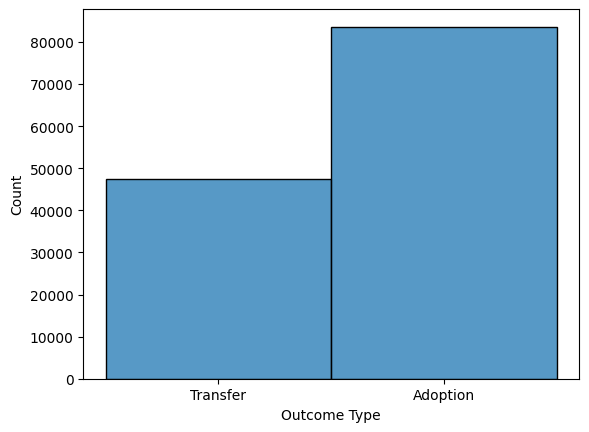

In [50]:
sns.histplot(data=animals['Outcome Type'] )

<Axes: xlabel='Sex upon Outcome', ylabel='count'>

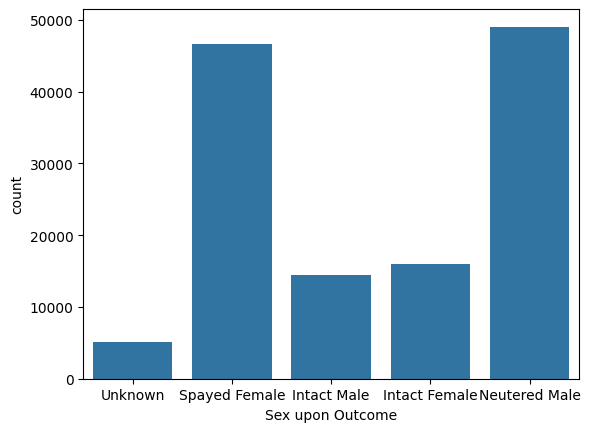

In [54]:
sns.countplot(x='Sex upon Outcome', data=animals)

<Axes: xlabel='Animal Type', ylabel='count'>

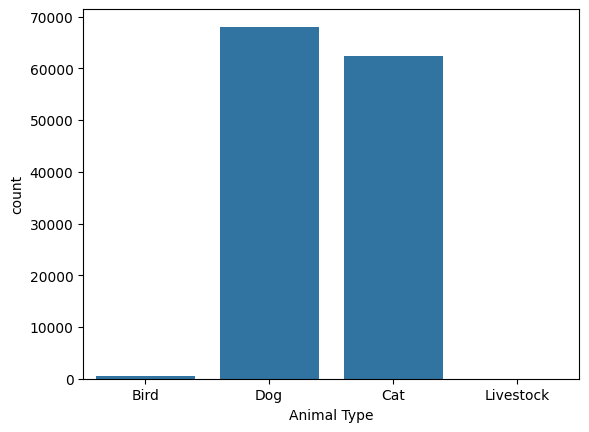

In [55]:
sns.countplot(x='Animal Type', data=animals)

# There are two outcome types: Transfer and Adoption, and there are more Adoption samples in the dataset than Transfer samples. Also, in the dataset, most sexes upon outcome are Spayed Female and Neutered Male, and most animal types are Dog and Cat. 

# Drop duplicate rows and irrelevant columns. (1 point)

In [56]:
animals.drop_duplicates(inplace=True, ignore_index=True)
animals.drop('Animal ID', axis=1, inplace=True)

# Convert all data to numeric and/or categorical data types. Hint: Make the Age at Outcome column a float by converting all values to one unit for example days. (1 point)

In [117]:
import numpy as np
import re

In [118]:
df = animals.copy()

In [119]:
# --- 1) Parse DateTime (tz-aware ISO like "2016-04-18T00:00:00-05:00") ---
# Parse to UTC to be consistent, then drop tz for numeric parts
# The code below was generated by AI; see [1].
dt = pd.to_datetime(df['DateTime'], format='ISO8601')
df['admit_year']  = dt.dt.year
df['admit_month'] = dt.dt.month
df['admit_day']   = dt.dt.day
df['admit_hour']  = dt.dt.hour
df.drop(columns=['DateTime'], inplace=True)

# Since MonthYear = admission month/year, make it from DateTime or drop it entirely
df.drop(columns=['MonthYear'], inplace=True, errors='ignore')

In [120]:
# --- 2) Date of Birth: keep only numeric parts (or compute age_at_admission) ---
# The code below was generated by AI; see [2].
dob = pd.to_datetime(df['Date of Birth'], format='%m/%d/%y', errors='coerce')
df['dob_year']  = dob.dt.year
df['dob_month'] = dob.dt.month
df['dob_day']   = dob.dt.day
df.drop(columns=['Date of Birth'], inplace=True)

In [121]:
# --- 3) Convert "Age upon Outcome" -> numeric days (optional but handy) ---
# The code below was generated by AI; see [3].
def age_to_days(s):
    if pd.isna(s): return np.nan
    m = re.match(r'^\s*(\d+(?:\.\d+)?)\s*([A-Za-z]+)\s*$', str(s))
    if not m: return np.nan
    v = float(m.group(1)); u = m.group(2).lower()
    mult = {'day':1,'days':1,'week':7,'weeks':7,'month':30,'months':30,'year':365,'years':365}.get(u)
    return v*mult if mult else np.nan

if 'Age upon Outcome' in df.columns:
    df['age_outcome_days'] = df['Age upon Outcome'].map(age_to_days)
    df.drop(columns=['Age upon Outcome'], inplace=True)

In [122]:
# 4) Convert high cardinal feature into numerical type
# Columns you want to frequency-encode
# The code below was generated by AI; see [4].
high_card_cols = ['Breed', 'Color', 'Name']

for col in high_card_cols:
    freq_map = df[col].value_counts().to_dict()
    df[col + '_freq'] = df[col].map(freq_map)
    df.drop(columns=[col], inplace=True)

In [123]:
# --- 5) Make everything else categorical (no plain 'object' left) ---
# The code below was generated by AI; see [5].
obj_cols = df.select_dtypes(include='object').columns
df[obj_cols] = df[obj_cols].apply(lambda s: s.astype('category'))


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131147 entries, 0 to 131146
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Outcome Type      131147 non-null  category
 1   Outcome Subtype   131147 non-null  category
 2   Animal Type       131147 non-null  category
 3   Sex upon Outcome  131147 non-null  category
 4   admit_year        131147 non-null  int32   
 5   admit_month       131147 non-null  int32   
 6   admit_day         131147 non-null  int32   
 7   admit_hour        131147 non-null  int32   
 8   dob_year          131147 non-null  int32   
 9   dob_month         131147 non-null  int32   
 10  dob_day           131147 non-null  int32   
 11  age_outcome_days  131147 non-null  float64 
 12  Breed_freq        131147 non-null  int64   
 13  Color_freq        131147 non-null  int64   
 14  Name_freq         131147 non-null  int64   
dtypes: category(4), float64(1), int32(7), int64(3)
memo

# Perform one-hot encoding on categorical variables (1 point)

In [125]:
df.describe(include='all')

,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,admit_year,admit_month,admit_day,admit_hour,dob_year,dob_month,dob_day,age_outcome_days,Breed_freq,Color_freq,Name_freq
count,131147,131147,131147,131147,131147.000000,131147.000000,131147.000000,131147.000000,131147.000000,131147.000000,131147.000000,131147.000000,131147.000000,131147.000000,131147.000000
unique,2,9,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Adoption,Partner,Dog,Neutered Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,83614,79724,68055,49032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2018.587318,6.755839,15.868117,14.313366,2016.959725,6.240181,15.470647,575.029905,11986.215933,4972.472577,2006.197511
std,NaN,NaN,NaN,NaN,3.318297,3.332570,8.797635,3.717956,4.195993,3.195365,8.838323,876.427256,12613.353206,4565.535080,5251.540800
min,NaN,NaN,NaN,NaN,2013.000000,1.000000,1.000000,0.000000,1991.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,2016.000000,4.000000,8.000000,12.000000,2014.000000,4.000000,8.000000,60.000000,491.000000,2007.000000,5.000000
50%,NaN,NaN,NaN,NaN,2018.000000,7.000000,16.000000,15.000000,2017.000000,6.000000,15.000000,240.000000,5074.000000,3055.000000,22.000000
75%,NaN,NaN,NaN,NaN,2021.000000,10.000000,23.000000,17.000000,2020.000000,9.000000,23.000000,730.000000,21792.000000,9731.000000,88.000000


In [126]:
cat_cols = df.select_dtypes(include=['category']).columns
df = pd.get_dummies(df, columns=cat_cols, dtype=int)

In [129]:
df.describe(include='all')

,admit_year,admit_month,admit_day,admit_hour,dob_year,dob_month,dob_day,age_outcome_days,Breed_freq,Color_freq,...,Outcome Subtype_Snr,Animal Type_Bird,Animal Type_Cat,Animal Type_Dog,Animal Type_Livestock,Sex upon Outcome_Intact Female,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown
count,131147.000000,131147.000000,131147.000000,131147.000000,131147.000000,131147.000000,131147.000000,131147.000000,131147.000000,131147.000000,...,131147.000000,131147.000000,131147.000000,131147.000000,131147.000000,131147.000000,131147.000000,131147.000000,131147.000000,131147.00000
mean,2018.587318,6.755839,15.868117,14.313366,2016.959725,6.240181,15.470647,575.029905,11986.215933,4972.472577,...,0.034107,0.004468,0.476420,0.518922,0.000191,0.121596,0.110044,0.373871,0.355609,0.03888
std,3.318297,3.332570,8.797635,3.717956,4.195993,3.195365,8.838323,876.427256,12613.353206,4565.535080,...,0.181504,0.066696,0.499446,0.499644,0.013805,0.326820,0.312946,0.483832,0.478699,0.19331
min,2013.000000,1.000000,1.000000,0.000000,1991.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2016.000000,4.000000,8.000000,12.000000,2014.000000,4.000000,8.000000,60.000000,491.000000,2007.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2018.000000,7.000000,16.000000,15.000000,2017.000000,6.000000,15.000000,240.000000,5074.000000,3055.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,2021.000000,10.000000,23.000000,17.000000,2020.000000,9.000000,23.000000,730.000000,21792.000000,9731.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
max,2025.000000,12.000000,31.000000,23.000000,2025.000000,12.000000,31.000000,10950.000000,30569.000000,14015.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


# Part 2

# First, drop the Breed column, as it will complicate the analysis here in Part 3. 
Split the data into training and test datasets. Make sure your split is reproducible and that it maintains roughly the proportion of each class of dependent variable. (1 point)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131147 entries, 0 to 131146
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   admit_year                      131147 non-null  int32  
 1   admit_month                     131147 non-null  int32  
 2   admit_day                       131147 non-null  int32  
 3   admit_hour                      131147 non-null  int32  
 4   dob_year                        131147 non-null  int32  
 5   dob_month                       131147 non-null  int32  
 6   dob_day                         131147 non-null  int32  
 7   age_outcome_days                131147 non-null  float64
 8   Breed_freq                      131147 non-null  int64  
 9   Color_freq                      131147 non-null  int64  
 10  Name_freq                       131147 non-null  int64  
 11  Outcome Type_Adoption           131147 non-null  int64  
 12  Outcome Type_Tra

In [133]:
df.drop(columns=['Breed_freq'], inplace=True)

In [135]:
# Split data
df.drop(columns=['Outcome Type_Transfer'], inplace=True)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131147 entries, 0 to 131146
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   admit_year                      131147 non-null  int32  
 1   admit_month                     131147 non-null  int32  
 2   admit_day                       131147 non-null  int32  
 3   admit_hour                      131147 non-null  int32  
 4   dob_year                        131147 non-null  int32  
 5   dob_month                       131147 non-null  int32  
 6   dob_day                         131147 non-null  int32  
 7   age_outcome_days                131147 non-null  float64
 8   Color_freq                      131147 non-null  int64  
 9   Name_freq                       131147 non-null  int64  
 10  Outcome Type_Adoption           131147 non-null  int64  
 11  Outcome Subtype_Barn            131147 non-null  int64  
 12  Outcome Subtype_

In [137]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Outcome Type_Adoption'])
y = df['Outcome Type_Adoption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

# Perform classification to predict using OutcomeType (4 points)
K-Nearest Neighbor Classifier (1 point)

K-Nearest Neighbor Classifier using Grid search CV (2 points)

Linear classification (1 point)

In [156]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

In [157]:
knn = KNeighborsClassifier(n_neighbors=300)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [158]:
param_grid = {"n_neighbors": np.array([5, 10, 25, 50, 100, 200, 300, 400])}
knn_search_accuracy = KNeighborsClassifier()
knn_gscv = GridSearchCV(knn_search_accuracy, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)
y_pred_knnG = knn_gscv.best_estimator_.predict(X_test)

In [159]:
lc_model = SGDClassifier(loss="perceptron", alpha=0.05, random_state=1)
lc_model.fit(X_train, y_train)
y_pred_lc = lc_model.predict(X_test)

# Print report showing accuracy, recall, precision and f1-score for each classification model. Which metric is most important for this problem? (You will explain your answer in the report in Part 3). ( 2 points)

In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def evaluate_model(model, X_test, y_pred, y_test, model_name="Model"):
    print(f"=== {model_name} ===")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1-score :", f1_score(y_test, y_pred))

evaluate_model(knn, X_test, y_pred_knn, y_test, "K nearest neighbor")
evaluate_model(knn_gscv, X_test, y_pred_knnG, y_test, "K-Nearest Neighbor Classifier using Grid search CV")
evaluate_model(lc_model, X_test, y_pred_lc, y_test, "Linear Classification")

=== K nearest neighbor ===
Accuracy : 0.7364086923370187
Precision: 0.7349878625271496
Recall   : 0.9173211082320112
F1-score : 0.816094196088167
=== K-Nearest Neighbor Classifier using Grid search CV ===
Accuracy : 0.7625873681535138
Precision: 0.7601797990481227
Recall   : 0.9168825991628463
F1-score : 0.831210133535715
=== Linear Classification ===
Accuracy : 0.6533485830474012
Precision: 0.6516106813606019
Recall   : 0.9805461431134144
F1-score : 0.7829325354511164
